# Heart Disease Prediction Using Machine Learning
**Student Name :** Shreya Dipak Patil **<br>**
**Course :** Machine Learning using Python **<br>**
**Project Type :** Capstone Project **<br>**
**Objective :** To build a machine learning model that predicts the presence of heart disease in a patient based on clinical features.

### Step 1: Import essential libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML model tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

### Step 2: Load the dataset

In [33]:
df = pd.read_csv("heart.csv")

In [4]:
# show first 5 rows
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
# Shape of the dataset
print("Dataset shape : ",df.shape)

Dataset shape :  (918, 12)


In [6]:
# Column info and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
# Summary Statistics
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
# Check for null values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

The dataset contains 918 records with 11 clinical features and 1 target column (`HeartDisease`). <br>
Target classes: 0 = No disease, 1 = Disease

### Step 3 : Exploratory Data Analysis (EDA)

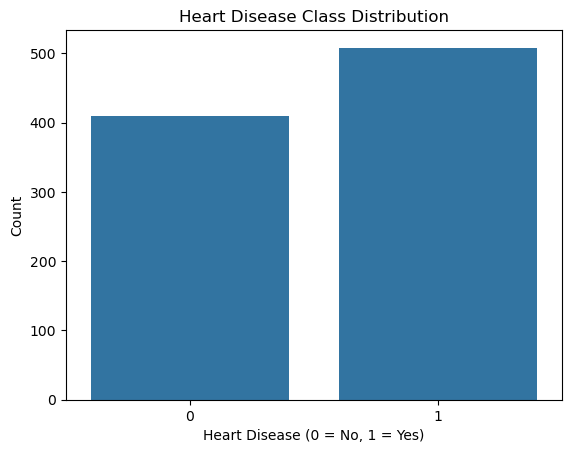

In [9]:
sns.countplot(x='HeartDisease', data=df)
plt.title("Heart Disease Class Distribution")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

In [10]:
# Check how many in each class
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

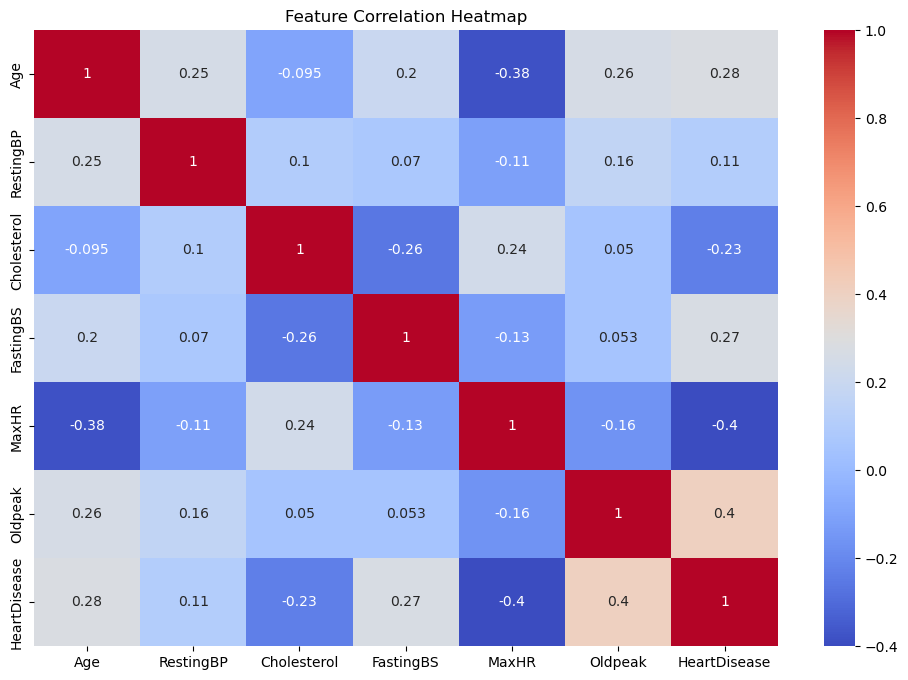

In [13]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

### Step 4 : Preprocessing and Feature Engineering

In [14]:
# Encode categorical columns using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


In [15]:
# Features and Target
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

In [16]:
# Split : 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Step 5 : Model Building and Evaluation
I will train and evaluate multiple classification models:
- Logistic Regression
- Decision Tree
- Random Forest
- Support Vector Machine (SVM)
- K-Nearest Neighbors (KNN)

In [19]:
# Logistic Regression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Logistic Regression Results : ")
print("Accuracy : ",accuracy_score(y_test, y_pred_log))
print("Classification Report : \n", classification_report(y_test, y_pred_log))

Logistic Regression Results : 
Accuracy :  0.8532608695652174
Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



In [21]:
# Decision Tree

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Results : ")
print("Accuracy : ",accuracy_score(y_test, y_pred_dt))
print("Classification Report : \n", classification_report(y_test, y_pred_dt))

Decision Tree Results : 
Accuracy :  0.8478260869565217
Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.81      0.82        77
           1       0.86      0.88      0.87       107

    accuracy                           0.85       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184



In [22]:
# Random Forest

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Results : ")
print("Accuracy : ",accuracy_score(y_test, y_pred_rf))
print("Classification Report : \n", classification_report(y_test, y_pred_rf))

Random Forest Results : 
Accuracy :  0.8641304347826086
Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.84      0.84        77
           1       0.89      0.88      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



In [23]:
# Support Vector Machine (SVM)

svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("SVM Results : ")
print("Accuracy : ",accuracy_score(y_test, y_pred_svm))
print("Classification Report : \n", classification_report(y_test, y_pred_svm))

SVM Results : 
Accuracy :  0.875
Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.87      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



In [24]:
# K-Nearest Neighbors (KNN)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("KNN Results : ")
print("Accuracy : ",accuracy_score(y_test, y_pred_knn))
print("Classification Report : \n", classification_report(y_test, y_pred_knn))

KNN Results : 
Accuracy :  0.8532608695652174
Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



### Step 6: Result Comparison and Visualization
I compare accuracy of all trained models and visualize the confusion matrix of the best-performing one.

In [27]:
# Compare Accuracy Scores
model_scores = {
    'Logistic Regression' : accuracy_score(y_test, y_pred_log),
    'Decision Tree' : accuracy_score(y_test, y_pred_dt),
    'Random Forest' : accuracy_score(y_test, y_pred_rf),
    'SVM' : accuracy_score(y_test, y_pred_svm),
    'KNN' : accuracy_score(y_test, y_pred_knn)
}

# Show as DataFrame
import pandas as pd
results_df = pd.DataFrame(model_scores.items(), columns=['Model', 'Accuracy'])
results_df.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
3,SVM,0.875000
2,Random Forest,0.864130
0,Logistic Regression,0.853261
4,KNN,0.853261
1,Decision Tree,0.847826


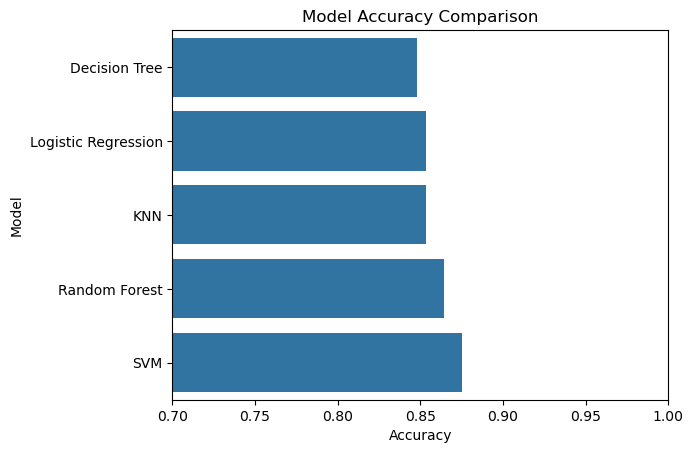

In [28]:
# Plot a Bar Chart
sns.barplot(x='Accuracy', y='Model', data=results_df.sort_values(by='Accuracy', ascending=True))
plt.title('Model Accuracy Comparison')
plt.xlim(0.7, 1)
plt.show()

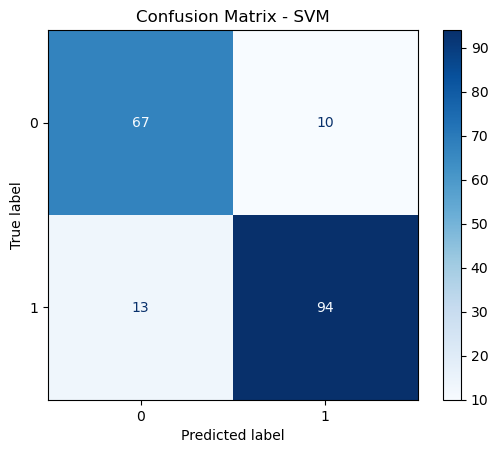

In [31]:
# Confusion Matrix for the best model

cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.show()

#### Summary of Results

- Among all trained models, **Support Vector Machine (SVM)** gave the highest accuracy.
- **SVM Accuracy:** 87.5%
- The confusion matrix shows that the SVM model correctly classified most positive and negative heart disease cases.
- This makes SVM the best-performing model for this dataset.

### Step 7: Conclusion

In this project, I built a machine learning model to predict the presence of heart disease based on patient clinical data. We compared five classification algorithms:

- Logistic Regression  
- Decision Tree  
- Random Forest  
- K-Nearest Neighbors  
- Support Vector Machine (SVM)

After evaluating all models, **Support Vector Machine (SVM)** performed best with the highest accuracy.  
We visualized the confusion matrix of SVM and confirmed its strength in classifying both heart disease and non-disease cases.

### Recommendations:
- More features (like ECG data, lifestyle factors) could improve prediction.
- This model could be deployed in hospitals as a screening tool.
